<a href="https://colab.research.google.com/github/dsreeramya/stressdetection/blob/main/try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
# np.set_printoptions(threshold=1000)
# with open('/content/drive/MyDrive/datasets/WESAD/S10/S10.pkl','rb') as file:
#   data=pickle.load(file,encoding='latin1')
# label=np.arange(3545100)
# for i in range (0,3545100):
#   label[i]=data['label'][i]
# print(label[2542100:2544100])

#, 1 = baseline, 2 = stress, 3 = amusement
SUBJECTS = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]
BASELINE_DATA = []
AMUSEMENT_DATA = []
STRESS_DATA = []

BASELINE = 1
STRESS = 2
AMUSEMENT=3

RAW_SENSOR_VALUES = ['ACC','ECG','EDA','EMG','Resp','Temp']
path="/content/drive/MyDrive/datasets/WESAD/"

for subject in SUBJECTS:
  pathname=path+'S'+str(subject)+'/'+'S'+str(subject)+'.pkl'
  with open(pathname,'rb') as file:
    data=pickle.load(file,encoding='latin1')
    baseline_indices=np.nonzero(data['label']==BASELINE)[0] #indices of baseline values
    #print(baseline_indices)
    stress_indices=np.nonzero(data['label']==STRESS)[0] #indices of stress values
    amusement_indices=np.nonzero(data['label']==AMUSEMENT)[0] #indices of amusement values
    base=dict()
    stress=dict()
    amusement=dict()
    
    for value in RAW_SENSOR_VALUES:
      base[value]=data['signal']['chest'][value][baseline_indices]
      stress[value]=data['signal']['chest'][value][stress_indices]
      amusement[value]=data['signal']['chest'][value][amusement_indices]
    BASELINE_DATA.append(base)
    STRESS_DATA.append(stress)
    AMUSEMENT_DATA.append(amusement)

In [ ]:
def features_extraction(data,subjects=SUBJECTS):
  FEATURES={'accx':[],'accy':[],'accz':[],'ecg':[],'eda':[],'emg':[],'resp':[],'temp':[]}
  for index in range(0,np.shape(data)[0]):
    #extract acc values
    values=data[index]['ACC']
    accx=values[0:99999,0]
    accy=values[0:99999,1]
    accz=values[0:99999,2]
    FEATURES['accx'].extend(accx)
    FEATURES['accy'].extend(accy)
    FEATURES['accz'].extend(accz)

    #extract ecg values
    values=data[index]['ECG'] 
    ecg=values[:99999,0] #to reduce the originally stored 2d array to a 1d array as it had one col only
    #print(type(ecg))
    #print(np.shape(ecg))
    #print(ecg)
    FEATURES['ecg'].extend(ecg)

    #extract values of eda
    values=data[index]['EDA'] #replace 3 with index
    eda=values[:99999,0] #to reduce the originally stored 2d array to a 1d array as it had one col only
    # print(type(eda))
    # print(np.shape(eda))
    # print(eda)
    FEATURES['eda'].extend(eda) 

    #extract values of emg
    values=data[index]['EMG']
    emg=values[:99999,0] #to reduce the originally stored 2d array to a 1d array as it had one col only
    # print(type(emg))
    # print(np.shape(emg))
    # print(emg)
    FEATURES['emg'].extend(emg)

    #extract values of resp
    values=data[index]['Resp'] #replace 3 with index
    resp=values[:99999,0] #to reduce the originally stored 2d array to a 1d array as it had one col only
    # print(type(resp))
    # print(np.shape(resp))
    # print(resp)
    FEATURES['resp'].extend(resp)

    #extract values of temp
    values=data[index]['Temp'] #replace 3 with index
    temp=values[:99999,0] #to reduce the originally stored 2d array to a 1d array as it had one col only
    # print(type(temp))
    # print(np.shape(temp))
    # print(temp)
    FEATURES['temp'].extend(temp)

  return FEATURES

BASELINE_FEATURES=features_extraction(BASELINE_DATA)
STRESS_FEATURES=features_extraction(STRESS_DATA)
AMUSEMENT_FEATURES=features_extraction(AMUSEMENT_DATA)

In [ ]:
#Splitting data 
X1=[]
X2=[]
X3=[]

#appending baseline features 
for i in range(0,len(BASELINE_FEATURES['accx'])):
  X1.append([BASELINE_FEATURES['accx'][i],BASELINE_FEATURES['accy'][i],BASELINE_FEATURES['accz'][i],BASELINE_FEATURES['ecg'][i],BASELINE_FEATURES['eda'][i],BASELINE_FEATURES['emg'][i],BASELINE_FEATURES['resp'][i],BASELINE_FEATURES['temp'][i]])
#appending stress features
for i in range(0,len(STRESS_FEATURES['accx'])):
  X2.append([STRESS_FEATURES['accx'][i],STRESS_FEATURES['accy'][i],STRESS_FEATURES['accz'][i],STRESS_FEATURES['ecg'][i],STRESS_FEATURES['eda'][i],STRESS_FEATURES['emg'][i],STRESS_FEATURES['resp'][i],STRESS_FEATURES['temp'][i]])
#appending amusement features
for i in range(0,len(AMUSEMENT_FEATURES['accx'])):
  X3.append([AMUSEMENT_FEATURES['accx'][i],AMUSEMENT_FEATURES['accy'][i],AMUSEMENT_FEATURES['accz'][i],AMUSEMENT_FEATURES['ecg'][i],AMUSEMENT_FEATURES['eda'][i],AMUSEMENT_FEATURES['emg'][i],AMUSEMENT_FEATURES['resp'][i],AMUSEMENT_FEATURES['temp'][i]])

#initializing y:0-base,1-stress,2-amusement 
Y1=[0]*len(X1) #baseline
Y2=[1]*len(X2) #stress
Y3=[2]*len(X3) #amusement

#concatenating all the input data
X=np.concatenate((X1,X2,X3),axis=0)
#concatenating all output labels
Y=np.concatenate((Y1,Y2,Y3),axis=0)

#split data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)#80% training 20% testing
print(X_test[0])
print(Y_test[0])
print(X_test[2])
print(Y_test[2])
print(X_test[4])
print(Y_test[4])

[ 7.12800026e-01  3.02000046e-02 -6.15800023e-01  6.50024414e-02
  9.06372070e-01 -9.01794434e-03  1.06811523e-02  3.44331360e+01]
2
[ 8.76000047e-01  5.73999882e-02 -2.50400007e-01 -5.17730713e-02
  6.37016296e+00 -1.02081299e-02 -1.67846680e-01  3.38657837e+01]
0
[ 8.88399959e-01  1.29400015e-01  1.25599980e-01  1.05422974e-01
  7.08656311e+00 -3.11279297e-03  1.10626221e+00  3.21295166e+01]
1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import sparse_categorical_crossentropy


model=Sequential([
    Dense(units=8, input_shape=(8,),activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=3,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=20)
#test_loss, test_acc = model.evaluate(X_test, Y_test)
#print('Tested Acc:',test_acc)

Epoch 1/20
90000/90000 [==============================] - 212s 2ms/step - loss: 0.7739 - accuracy: 0.6349 - val_loss: 0.6131 - val_accuracy: 0.6981
Epoch 2/20
90000/90000 [==============================] - 201s 2ms/step - loss: 0.4962 - accuracy: 0.8038 - val_loss: 0.3862 - val_accuracy: 0.8595
Epoch 3/20
90000/90000 [==============================] - 204s 2ms/step - loss: 0.2917 - accuracy: 0.9161 - val_loss: 0.2443 - val_accuracy: 0.9401
Epoch 4/20
90000/90000 [==============================] - 209s 2ms/step - loss: 0.2306 - accuracy: 0.9411 - val_loss: 0.2041 - val_accuracy: 0.9493
Epoch 5/20
90000/90000 [==============================] - 207s 2ms/step - loss: 0.2125 - accuracy: 0.9457 - val_loss: 0.2090 - val_accuracy: 0.9445
Epoch 6/20
90000/90000 [==============================] - 207s 2ms/step - loss: 0.2044 - accuracy: 0.9481 - val_loss: 0.1818 - val_accuracy: 0.9569
Epoch 7/20
90000/90000 [==============================] - 204s 2ms/step - loss: 0.2002 - accuracy: 0.9496 - val_

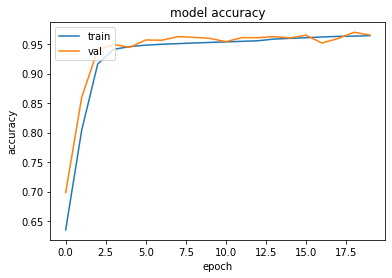

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

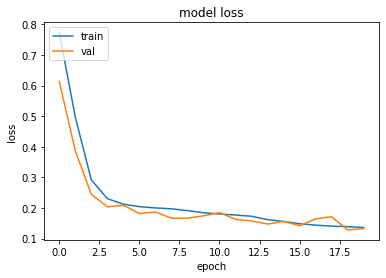

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
X=np.array([[8.76000047e-01,  5.73999882e-02, -2.50400007e-01, -5.17730713e-02, 6.37016296e+00, -1.02081299e-02, -1.67846680e-01,  3.38657837e+01]])
result = model.predict(X)
y_classes = result.argmax(axis=-1)
print("Prediction",y_classes)
if y_classes==0:
  print("Baseline")
elif y_classes==1:
  print("Stress")
elif y_classes==2:
  print("Amusement")
print("Prediction shape:",result.shape)

1/1 [==============================] - 0s 21ms/step
Prediction [0]
Baseline
Prediction shape: (1, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
X=np.array([[8.88399959e-01,  1.29400015e-01,  1.25599980e-01,  1.05422974e-01, 7.08656311e+00, -3.11279297e-03,  1.10626221e+00,  3.21295166e+01]])
result = model.predict(X)
y_classes = result.argmax(axis=-1)
print("Prediction",y_classes)
if y_classes==0:
  print("Baseline")
elif y_classes==1:
  print("Stress")
elif y_classes==2:
  print("Amusement")
print("Prediction shape:",result.shape)

1/1 [==============================] - 0s 22ms/step
Prediction [1]
Stress
Prediction shape: (1, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
X=np.array([[7.12800026e-01,  3.02000046e-02, -6.15800023e-01,  6.50024414e-02, 9.06372070e-01, -9.01794434e-0,  1.06811523e-02,  3.44331360e+01 ]])
result = model.predict(X)
y_classes = result.argmax(axis=-1)
print("Prediction",y_classes)
if y_classes==0:
  print("Baseline")
elif y_classes==1:
  print("Stress")
elif y_classes==2:
  print("Amusement")
print("Prediction shape:",result.shape)

1/1 [==============================] - 0s 19ms/step
Prediction [2]
Amusement
Prediction shape: (1, 3)


In [ ]:
class_names=[['accx','accy','accz','ecg','eda','emg','resp','temp']]
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X_test)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

   34/28125 [..............................] - ETA: 42s  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


28125/28125 [==============================] - 42s 2ms/step


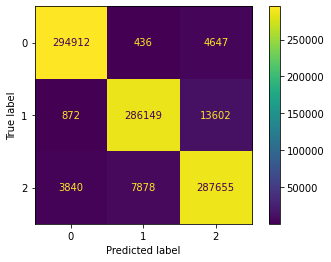

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=classifier, X=X_test, y_true=Y_test)